In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Kuliah/dataset2/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [ ]:
#Preprocessing
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head

<bound method NDFrame.head of         Name       Age  Income($)
0        Rob  0.058824   0.213675
1    Michael  0.176471   0.384615
2      Mohan  0.176471   0.136752
3     Ismail  0.117647   0.128205
4       Kory  0.941176   0.897436
5     Gautam  0.764706   0.940171
6      David  0.882353   0.982906
7     Andrea  0.705882   1.000000
8       Brad  0.588235   0.948718
9   Angelina  0.529412   0.726496
10    Donald  0.647059   0.786325
11       Tom  0.000000   0.000000
12    Arnold  0.058824   0.025641
13     Jared  0.117647   0.051282
14     Stark  0.176471   0.038462
15    Ranbir  0.352941   0.068376
16    Dipika  0.823529   0.170940
17  Priyanka  0.882353   0.153846
18      Nick  1.000000   0.162393
19      Alia  0.764706   0.299145
20       Sid  0.882353   0.316239
21     Abdul  0.764706   0.111111>

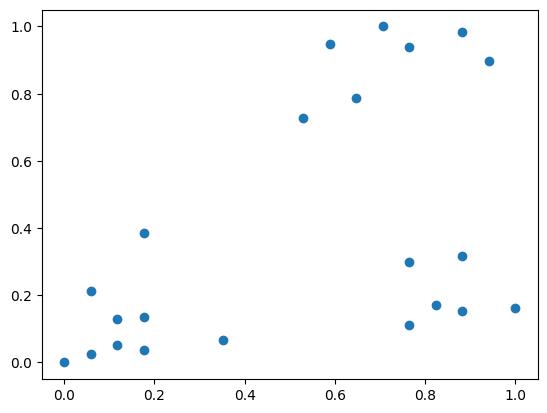

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
# untuk menginisasi parameter
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted =km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

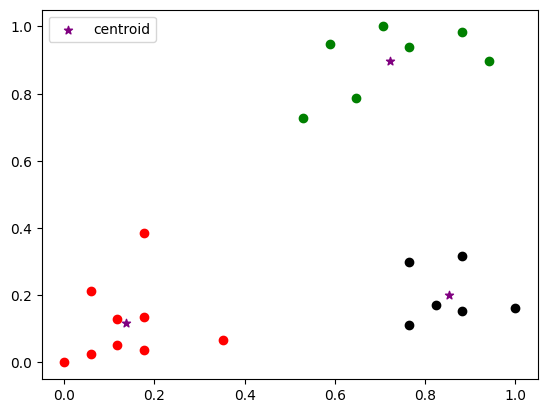

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*',label='centroid')
plt.legend()

In [ ]:
df.to_csv('/content/drive/My Drive/Kuliah/dataset2/Hasil/hasil.csv')